# **Extracting feature descriptors from the image dataset**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
# Harris corner detection
def harris(filename):
  img = cv2.imread(filename)
  img1= cv2.imread(filename)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  gray = np.float32(gray)
  dst = cv2.cornerHarris(gray,6,5,0.04)
  #result is dilated for marking the corners, not important
  dst = cv2.dilate(dst,None)
  # Threshold for an optimal value, it may vary depending on the image.
  img[dst>0.01*dst.max()]=[0,0,255]
  plt.figure(figsize=(15,15))
  plt.subplot(1,2,1)
  plt.imshow(img1)
  plt.title('Original Image')
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title('Corner Detection')
  plt.axis('off')
  plt.show()

In [ ]:
def orb(img1,img2):
  orb = cv2.ORB_create(nfeatures=50)
  keypoints_1, descriptors_1 = orb.detectAndCompute(img1,None)
  keypoints_2, descriptors_2 = orb.detectAndCompute(img2,None)
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
  matches = bf.match(descriptors_1,descriptors_2)
  matches = sorted(matches, key = lambda x:x.distance)
  matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:20], None,flags=2)
  plt.figure(figsize=(15,15))
  plt.title('Features Matching',fontsize=20)
  plt.imshow(cv2.cvtColor(matched_img,cv2.COLOR_BGR2RGB))

In [ ]:
def sift(img):
  sift=cv2.SIFT_create()
  keypoint=sift.detect(img,None)
  img=cv2.drawKeypoints(img,keypoint,img)
  plt.figure(figsize=(10,10))
  plt.title('SIFT feature detector')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

In [ ]:
def main():
  print('\nHarris Corner Detection')
  filename = '/content/drive/MyDrive/images.png'
  harris(filename)
  print("SIFT")
  img= cv2.imread('/content/drive/MyDrive/marvel/train/doctor strange/pic_011.jpg')
  cv2_imshow(img)
  sift(img)
  img1 = cv2.imread('/content/drive/MyDrive/marvel images/spider-man/pic_018.jpg')
  img2 = cv2.imread('/content/drive/MyDrive/marvel images/spider-man/pic_018 (2).jpg')
  orb(img1,img2)


Harris Corner Detection


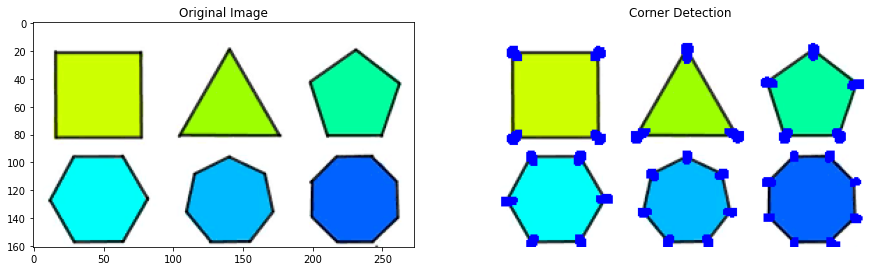

SIFT


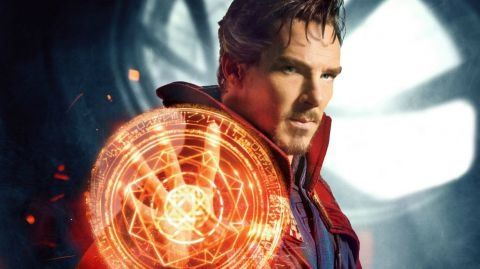

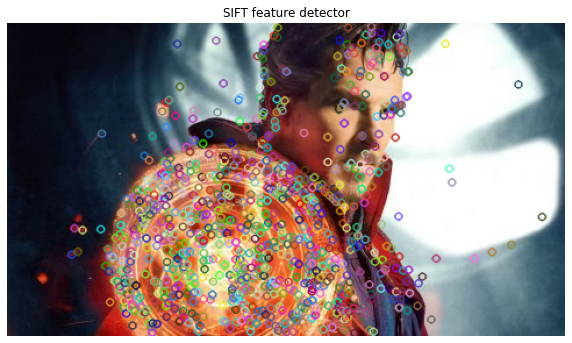

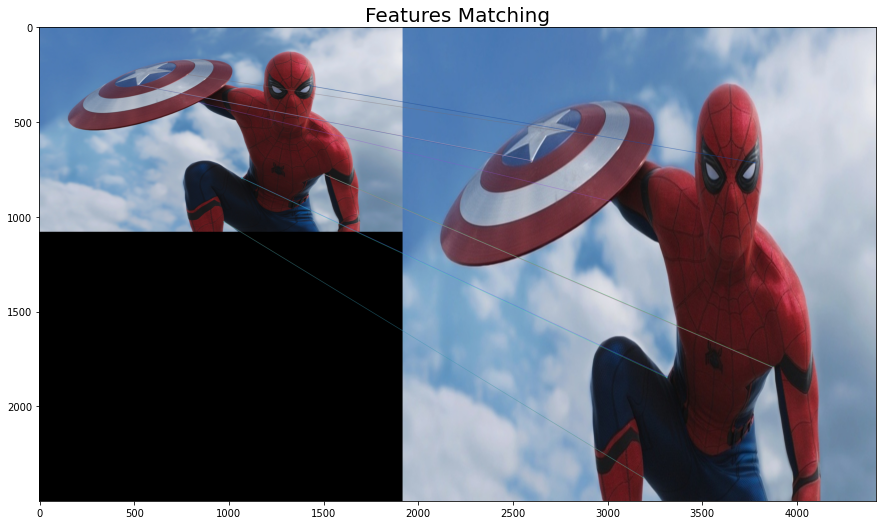

In [ ]:
main()